In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Методические указания

###Первоначальное знакомство с данными

In [7]:
prsa_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.2%20numeric%20features/data/PRSA_Data.csv", index_col=0)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [8]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         35064 non-null  int64  
 1   SO2        35064 non-null  float64
 2   NO2        35064 non-null  float64
 3   CO         35064 non-null  float64
 4   O3         35064 non-null  float64
 5   PRES       35064 non-null  float64
 6   RAIN       35064 non-null  float64
 7   wd         35064 non-null  object 
 8   WSPM       35064 non-null  float64
 9   AQI Label  35064 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [9]:
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


Пропущенные значения в датасете - это пустые ячейки в таблице данных, которые не содержат значений для определенной переменной или признака. Это может произойти по разным причинам, например, из-за ошибок в сборе данных, неполных ответов или пропусков при вводе данных.

Пропущенные значения в датасете могут быть представлены специальными значениями, отличными от NaN (Not a Number), такими как -9999, 999, -1, NA, NULL, и т.д. В некоторых случаях такие специальные значения используются для обозначения отсутствия данных вместо NaN. Важно учитывать эти специфические значения при анализе данных.

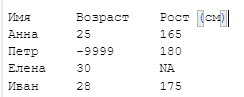

###Идентификация ошибочных значений

In [10]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [11]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         35064 non-null  int64  
 1   SO2        34489 non-null  float64
 2   NO2        33994 non-null  float64
 3   CO         33252 non-null  float64
 4   O3         32957 non-null  float64
 5   PRES       35044 non-null  float64
 6   RAIN       35044 non-null  float64
 7   wd         35064 non-null  object 
 8   WSPM       35050 non-null  float64
 9   AQI Label  35064 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


###Визуализация распределения атрибутов

<Axes: xlabel='SO2', ylabel='Count'>

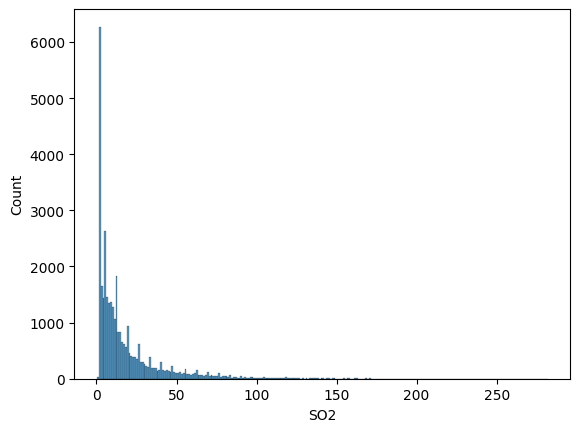

In [12]:
sns.histplot(prsa_data.SO2)

Налицо явная зависимость - чем меньше значение, тем оно вероятнее. Очень большие концентрации встречаются крайне редко. Плюс, на графике можно заметить определенные пики через равные промежутки значений. Это может говорить о попытках заполнения пропущенных значений или об округлении некоторых значений.

1. Заполнение пропущенных значений: Если в датасете были пропущенные значения и для их заполнения использовалось среднее или медианное значение по столбцу, то это может привести к образованию пика в распределении значений. Представим, что у нас есть столбец с возрастом людей, и в некоторых строках возраст пропущен. Если мы решим заполнить пропущенные значения средним возрастом всех людей в датасете, это может привести к тому, что много строк получат одно и то же значение, что создаст пик в распределении возраста на графике.

2. Округление значений: Если данные были округлены до определенного значения, например, до ближайшего целого числа, это может создать равные промежутки значений на графике. Например, если у нас есть столбец с длиной в сантиметрах, и значения были округлены до ближайшего десятка, то это может привести к тому, что на графике будут видны равные интервалы между значениями.

<Axes: xlabel='SO2', ylabel='Density'>

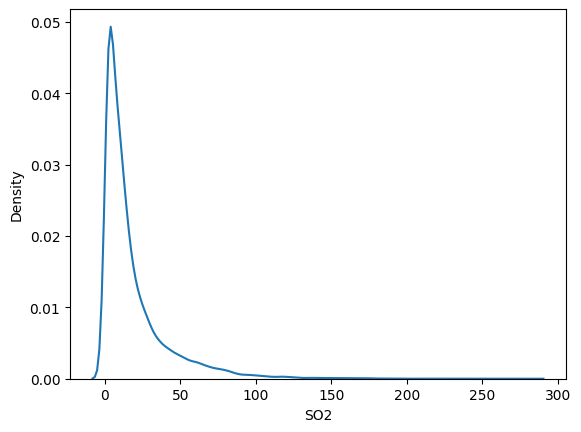

In [13]:
sns.kdeplot(prsa_data.SO2)

1. Гистограмма: Гистограмма представляет собой столбчатую диаграмму, где по горизонтальной оси отображаются интервалы значений, а по вертикальной оси - количество наблюдений, попадающих в каждый интервал. Гистограмма позволяет оценить форму и характер распределения данных, а также выявить наличие пиков, выбросов и общий характер распределения.

2. Плотность распределения: Плотность распределения показывает вероятность того, что случайно выбранное значение из данного набора данных окажется в определенном диапазоне. Плотность распределения обычно представляется с помощью кривой, которая выглядит более гладкой и непрерывной, чем гистограмма. Она позволяет лучше оценить форму распределения и представляет собой аппроксимацию реального распределения данных.

**Пример**

Представьте, что у вас есть данные о росте людей, и вы хотите изучить их распределение с помощью гистограммы и плотности распределения.

1. Гистограмма: Вы строите гистограмму, разбив данные на интервалы, например, каждые 5 см. По горизонтальной оси отмечены интервалы роста (например, от 150 до 155 см, от 155 до 160 см и т.д.), а по вертикальной оси указано количество людей, чей рост находится в каждом интервале. Так, если в интервале от 150 до 155 см находится 20 человек, то на гистограмме будет столбец, достигающий высоты 20.

2. Плотность распределения: Построив плотность распределения, вы увидите плавную кривую, которая показывает, как вероятность иметь определенный рост меняется по всему диапазону значений роста. Если плотность распределения достигает пика в районе 160 см, это означает, что вероятность того, что случайно выбранный человек из выборки имеет рост около 160 см, выше, чем в других областях.

<Axes: xlabel='NO2', ylabel='Density'>

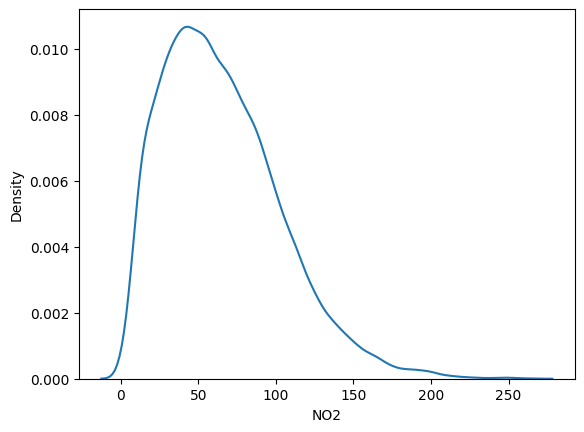

In [14]:
sns.kdeplot(prsa_data.NO2)

Здесь мы видим уже другое распределение - более распространены значения, близкие к 50.

<Axes: xlabel='CO', ylabel='Count'>

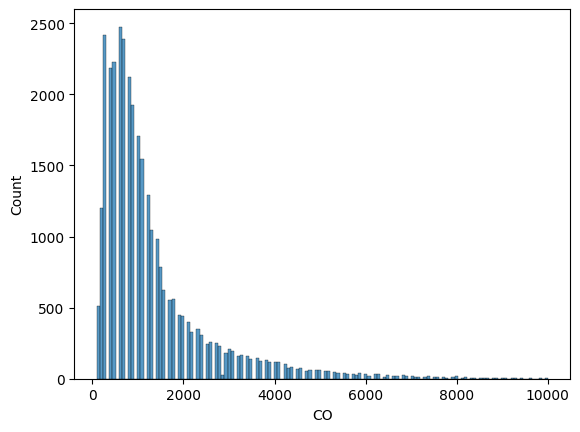

In [15]:
sns.histplot(prsa_data.CO)

Здесь видно достаточно гладкое распределение с модой в районе 1000.

<Axes: xlabel='O3', ylabel='Count'>

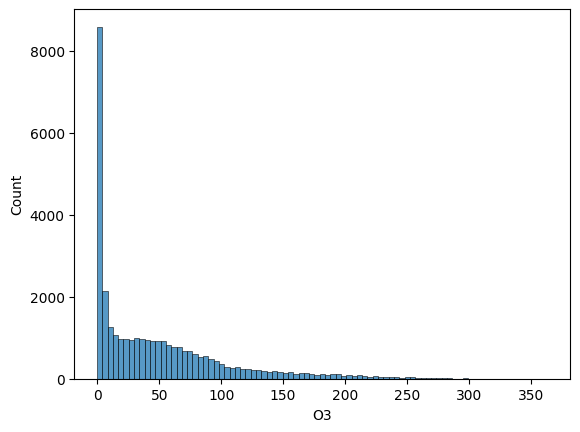

In [16]:
sns.histplot(prsa_data.O3)

На гистограмме явно видно, что нулевая концентрация встречается гораздо чаще ненулевых значений.

<Axes: xlabel='PRES', ylabel='Count'>

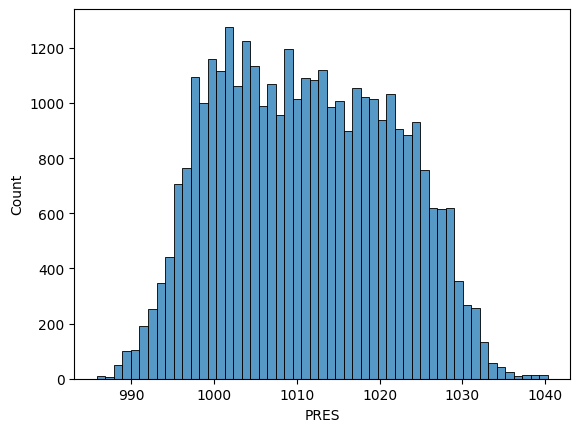

In [17]:
sns.histplot(prsa_data.PRES)

Распределение значения давления отличается от всех предыдущих. Видно, что есть некоторый диапазон условно равновероятных, "нормальных" значений, а частота значений давления вне этого диапазона быстро спадает.

Такие атрибуты тоже можно категоризовывать при необходимости.

Категоризация по уровням давления: Мы можем разделить значения давления на несколько категорий на основе их отклонения от среднего или медианного значения. Например, "Очень высокое давление", "Высокое давление", "Нормальное давление", "Низкое давление", "Очень низкое давление"

<Axes: xlabel='WSPM', ylabel='Count'>

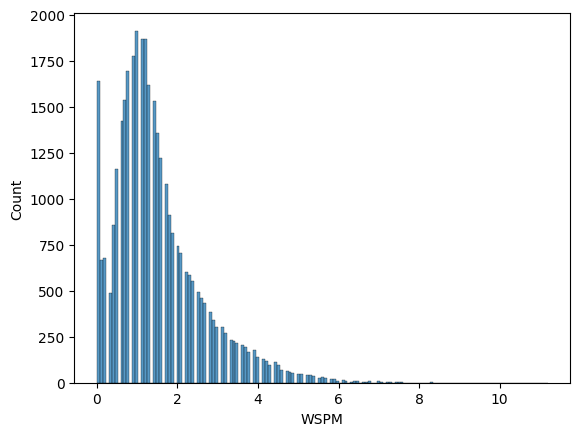

In [18]:
sns.histplot(prsa_data.WSPM)

<Axes: xlabel='RAIN', ylabel='Count'>

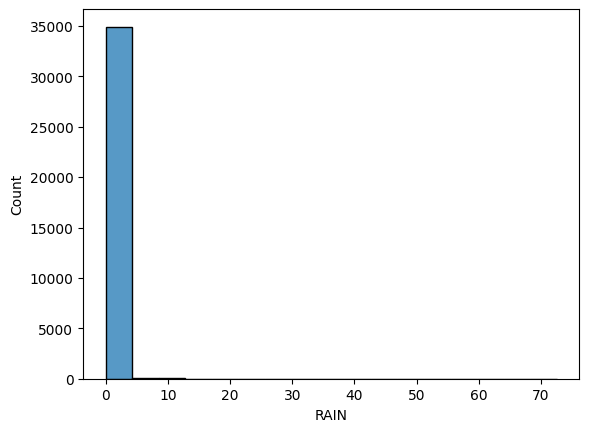

In [19]:
sns.histplot(prsa_data.RAIN)

Мы видим, что отсутствие осадков - самое распространенное значение. Ненулевые значения тут встречаются в подавляющем меньшинстве точек данных

###Бинаризация атрибутов

In [20]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [21]:
prsa_data.shape[0]

35064

In [22]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


### Визуализация связи атрибутов с целевой переменной

Связь атрибутов с целевой переменной - это понятие из области анализа данных и машинного обучения, которое описывает взаимосвязь между признаками (атрибутами) и целевой переменной в наборе данных. Основная идея заключается в том, что атрибуты могут содержать информацию, которая влияет на значение целевой переменной, которую мы хотим предсказать или анализировать.

Например, если у нас есть данные о продажах автомобилей, атрибутами могут быть такие характеристики автомобиля, как его марка, модель, год выпуска, пробег и т.д. Целевой переменной может быть цена автомобиля. В этом случае связь атрибутов с целевой переменной означает, что каждая из характеристик автомобиля может влиять на его цену.

Анализ связи атрибутов с целевой переменной помогает выявить наиболее значимые признаки, которые влияют на целевую переменную, и использовать их для прогнозирования, классификации или других задач машинного обучения. Это может включать в себя построение моделей, изучение корреляции между признаками и целевой переменной, а также выбор наиболее информативных признаков для использования в модели.

<Axes: xlabel='SO2', ylabel='Density'>

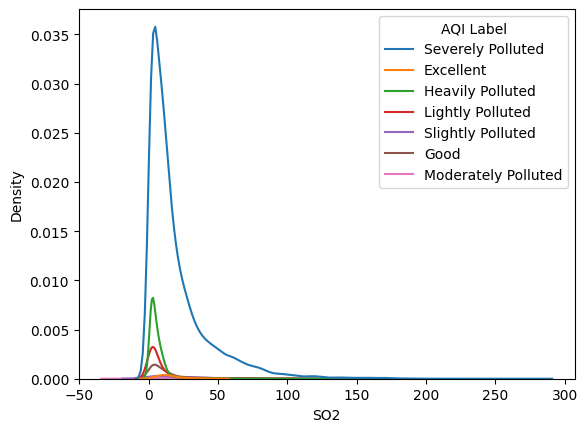

In [23]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

Мы построили график плотности распределения для атрибута SO2 из набора данных prsa_data.

Параметр hue="AQI Label" указывает, что данные будут разделены по значениям целевой переменной "AQI Label" (метка качества воздуха). Каждая кривая плотности распределения будет соответствовать одному из уровней качества воздуха, отражая распределение SO2 в зависимости от уровня качества воздуха.

Такой подход позволяет визуально сравнить распределения SO2 для разных уровней качества воздуха и выявить какие-либо закономерности или различия между ними.

Важно понять, есть ли участки на горизонтальной оси, на которых соотношение разных существенно отличается.

<ipython-input-24-0dcfe490e9c4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

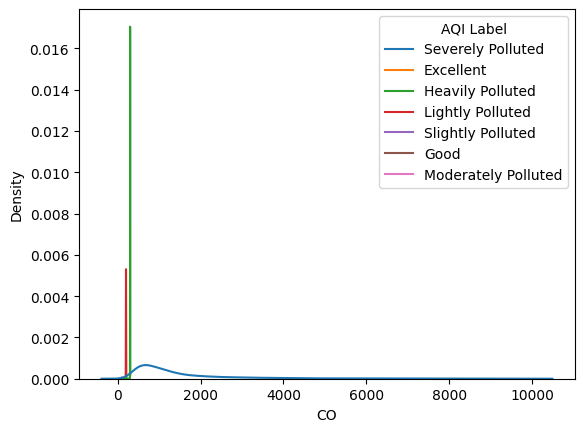

In [24]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

<ipython-input-25-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

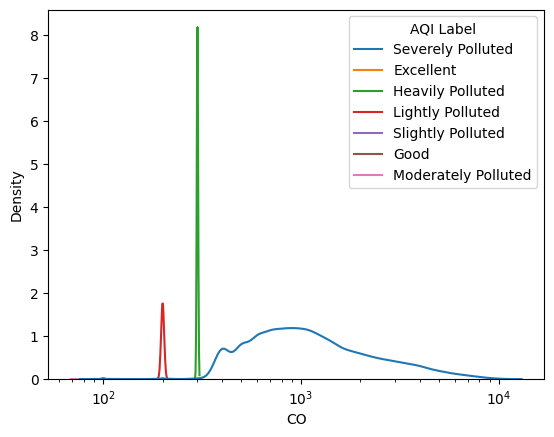

In [25]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

###Группировка численных значений

In [26]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [27]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


**Обратите внимание, что мы можем не удалять сразу исходный столбец. Обычно все ненужные столбцы удаляются из датасета в самом конце, перед массовым преобразованием категориальных переменных. Либо решение о целесообразности удаления можно принято позже, по результатам дальнейшего анализа.**

### Удаление экстремальных значений

In [28]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<ipython-input-28-5a60bf876b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES <= 992] = 992
<ipython-input-28-5a60bf876b2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES >= 1034] = 1034


<Axes: xlabel='PRES', ylabel='Count'>

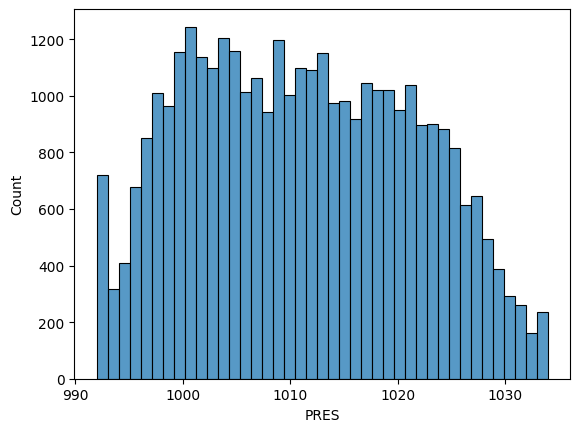

In [29]:
sns.histplot(prsa_data.PRES)

###Заполнение пропусков

<Axes: >

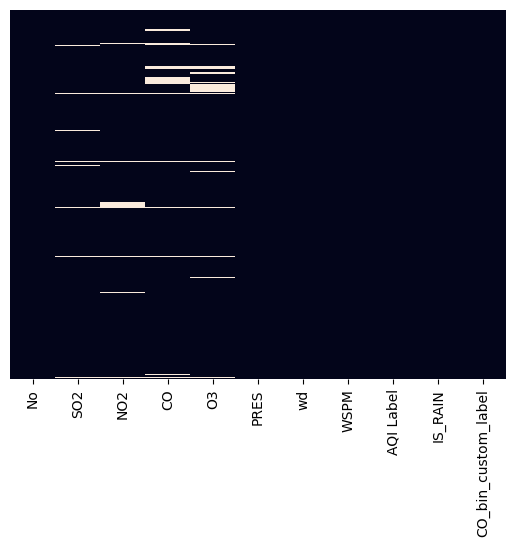

In [30]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Можно обратить внимание на то, что в датасете прослеживаются горизонтальные полосы. Это объекты, по которым неизвестны значения нескольких атрибутов. Можно вывести индексы объектов, у которых неизвестно значение более двух атрибутов:

In [31]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

Так как такие незаполненные объекты составляют очень малый процент выборки, для простоты обработки их можно просто удалить:

In [32]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

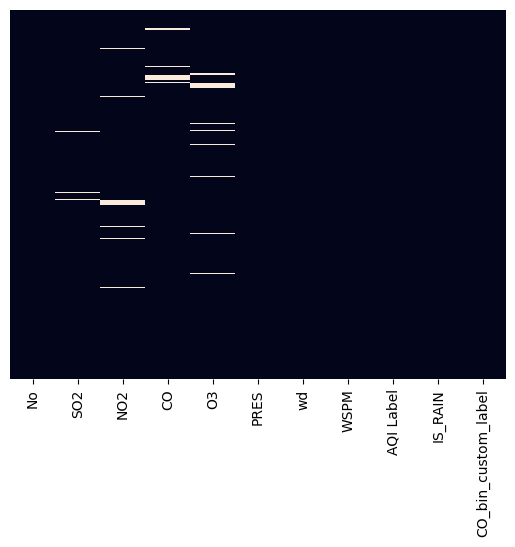

In [33]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [34]:
prsa_data.isnull().sum()

No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

По столбцу SO2 пропущено всего 281 значение. Это менее одного процента выборки. Можно просто заменить пропуски на среднее значение. Но так как эмпирическое распределение этого признака имеет большую асимметрию, лучше использовать медиану.

Почему использование медианы для заполнения пропущенных значений в столбце SO2 может быть предпочтительным, особенно при наличии асимметрии в распределении этого признака.

1. Устойчивость к выбросам: Предположим, что в данных о SO2 есть несколько выбросов - экстремальных значений, которые сильно отличаются от остальных. В таком случае, среднее значение может быть сильно искажено этими выбросами, в то время как медиана будет менее чувствительна к ним. Например, если у нас есть выбросы с очень высокими значениями SO2 из-за каких-то аномальных событий, медиана не будет сильно искажена этими значениями, в то время как среднее может быть существенно завышено.

2. Асимметричное распределение: Если распределение данных в столбце SO2 имеет большую асимметрию, например, является правосторонним (положительно асимметричным), то среднее значение также может быть смещено вправо. В таком случае, медиана, которая является серединой упорядоченного списка значений, будет более репрезентативной мерой центральной тенденции для этого распределения. Например, если большинство значений SO2 находятся в низких диапазонах, но есть несколько очень высоких значений, среднее будет сильно завышено, в то время как медиана будет ближе к типичному низкому значению SO2.

###SO2

**До заполнения**

<Axes: xlabel='SO2', ylabel='Density'>

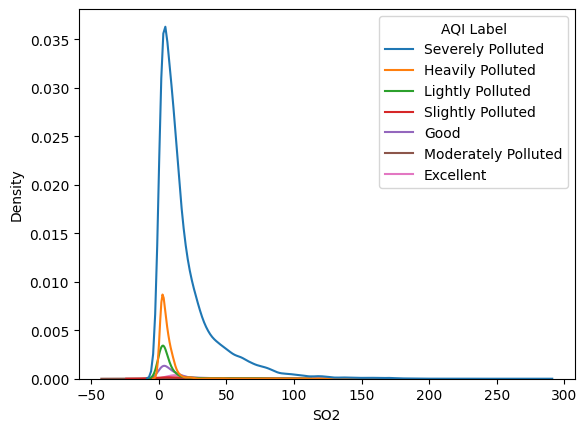

In [35]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

**После**

In [36]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.SO2.mean())

<Axes: xlabel='SO2', ylabel='Density'>

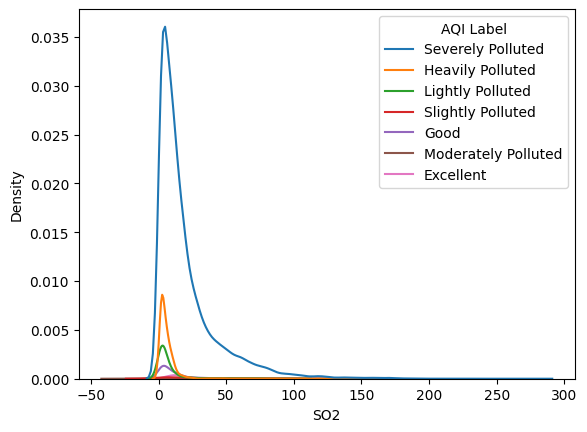

In [37]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

###O3

**До заполнения**

<Axes: xlabel='O3', ylabel='Density'>

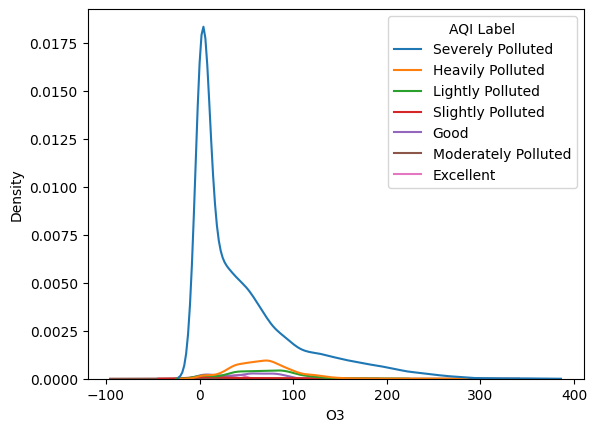

In [38]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

**После**

In [39]:
prsa_data.O3 = prsa_data.O3.fillna(prsa_data.O3.mean())

<Axes: xlabel='O3', ylabel='Density'>

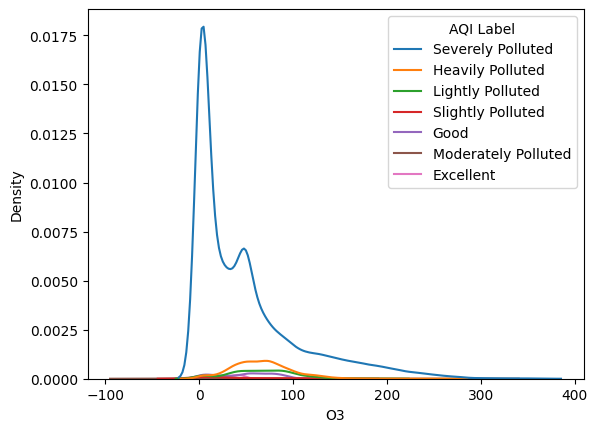

In [40]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

С другими столбцами, например, O3 искажение будет более существенным. Поэтому воспользуемся заполнением не средним, а случайным значением.

In [41]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [42]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [43]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

<Axes: xlabel='O3', ylabel='Density'>

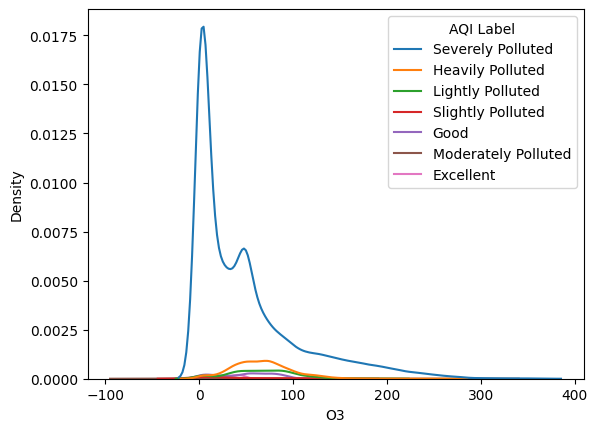

In [44]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

### Округление атрибутов

In [45]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,18.331045,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


In [46]:
prsa_data['SO2'] = np.array(np.round((prsa_data['SO2']), 2), dtype='int')
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,18,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,5,9,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,6,8,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


#Самостоятельные задания

####1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

In [47]:
features = [prsa_data.SO2, prsa_data.CO, prsa_data.NO2, prsa_data.O3, prsa_data.PRES, prsa_data.wd, prsa_data.WSPM]

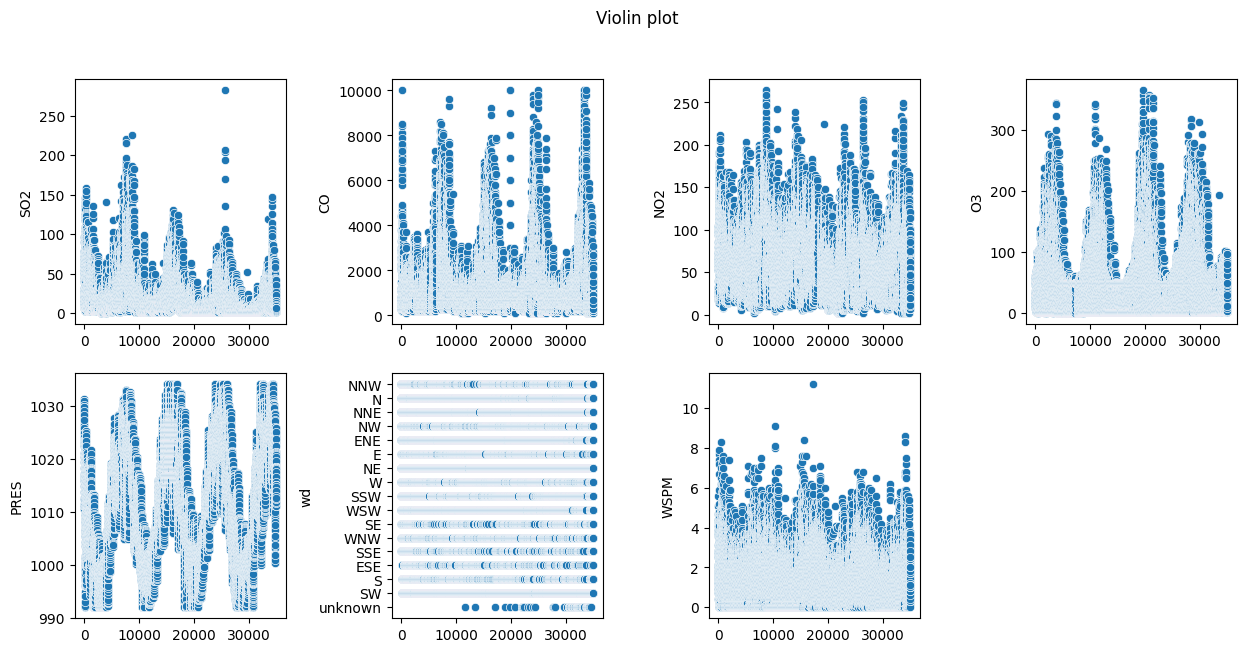

In [70]:
f = plt.figure(figsize=(15, 7))
for i, feature in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.scatterplot(data=feature)
f.suptitle('Scatter plot')
f.subplots_adjust(wspace=0.5)

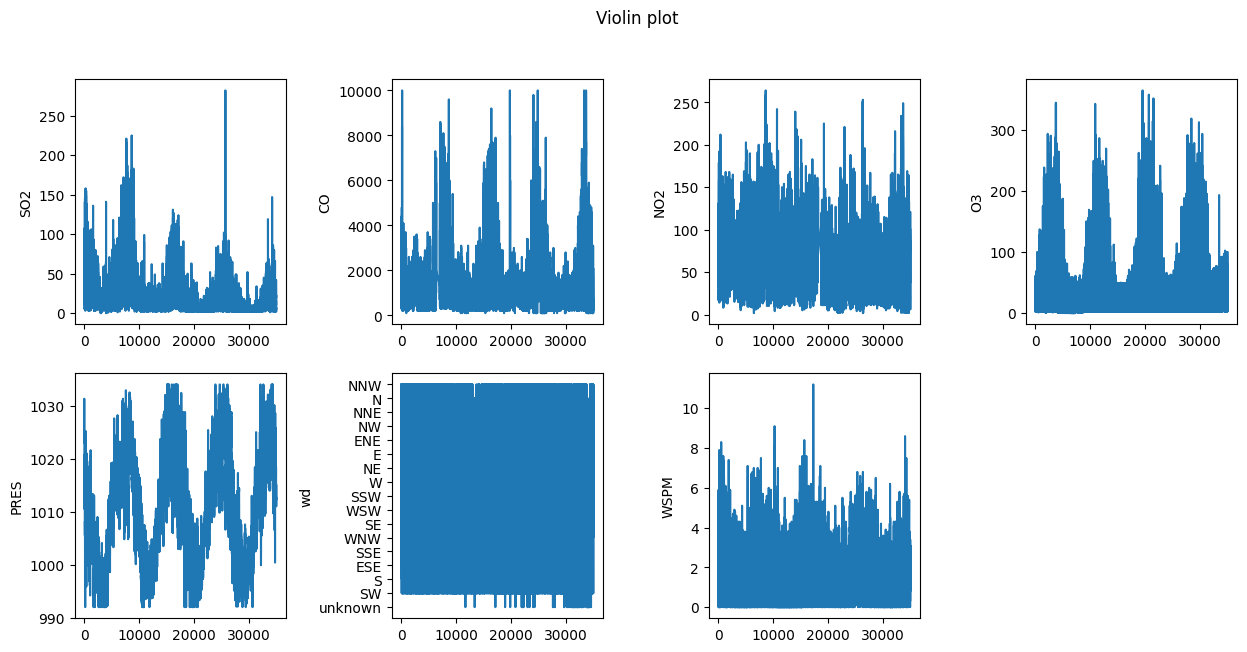

In [71]:
f = plt.figure(figsize=(15, 7))
for i, feature in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.lineplot(data=feature)
f.suptitle('Line plot')
f.subplots_adjust(wspace=0.5)

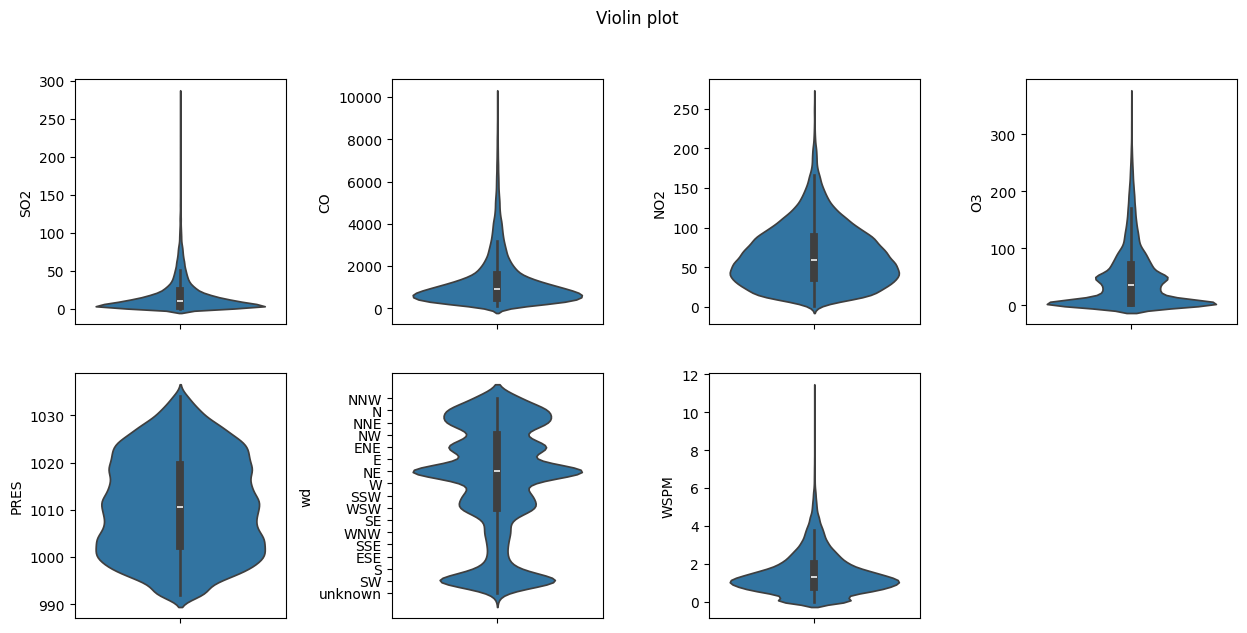

In [66]:
f = plt.figure(figsize=(15, 7))
for i, feature in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.violinplot(data=feature)
f.suptitle('Violin plot')
f.subplots_adjust(wspace=0.5)

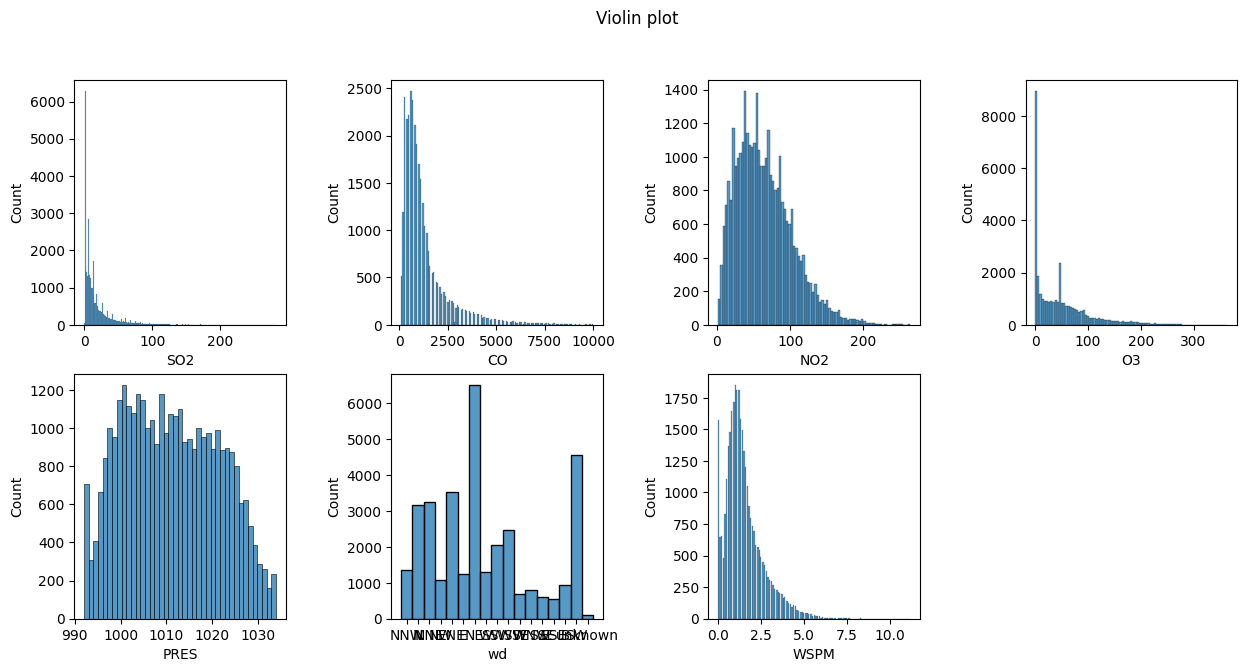

In [72]:
f = plt.figure(figsize=(15, 7))
for i, feature in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.histplot(data=feature)
f.suptitle('Hist plot')
f.subplots_adjust(wspace=0.5)

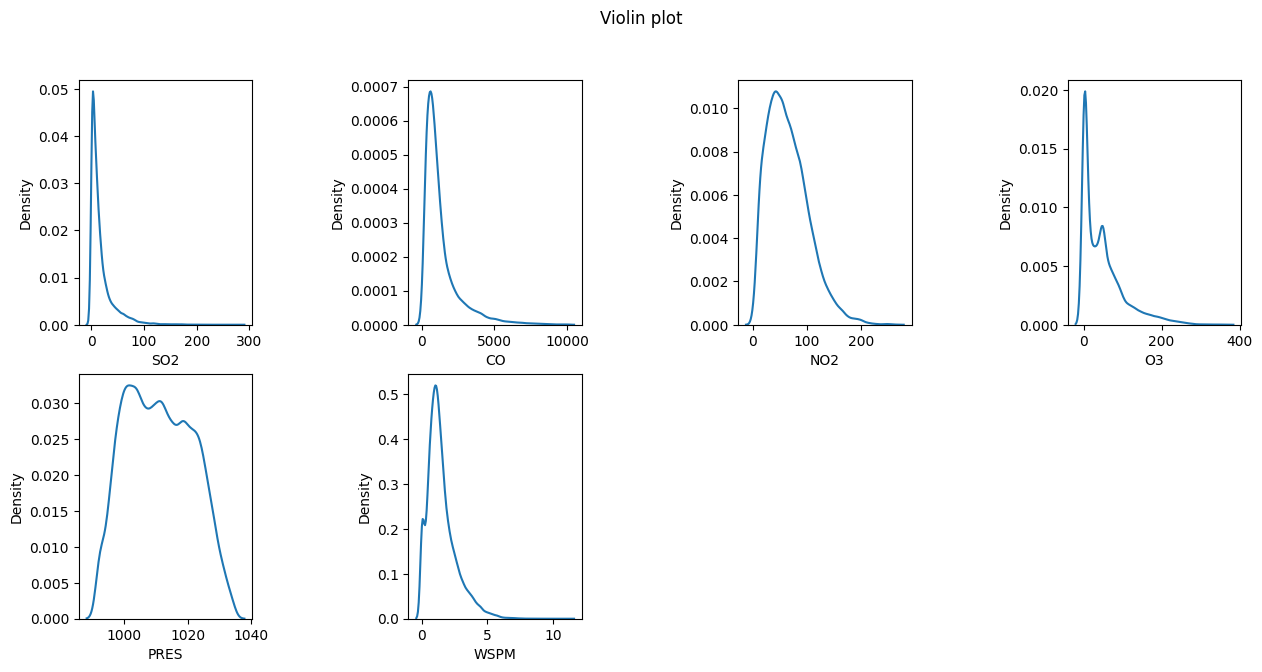

In [77]:
f = plt.figure(figsize=(15, 7))
for i, feature in enumerate([prsa_data.SO2, prsa_data.CO, prsa_data.NO2, prsa_data.O3, prsa_data.PRES, prsa_data.WSPM]):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(data=feature)
f.suptitle('KDE plot')
f.subplots_adjust(wspace=0.9)

<Axes: ylabel='SO2'>

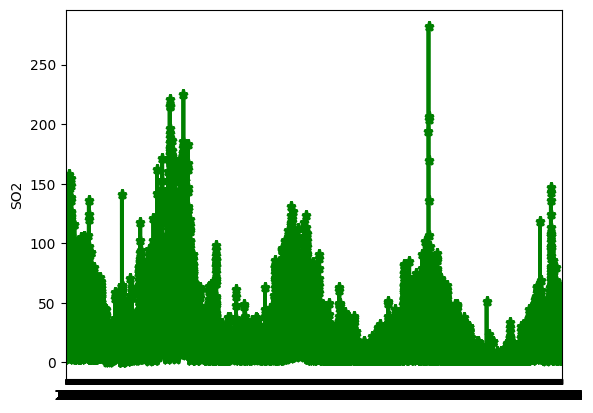

In [49]:
sns.pointplot(data=prsa_data.SO2)

In [89]:
features_name = [name for name in list(prsa_data.columns) if name != "AQI Label" and name != "No"]

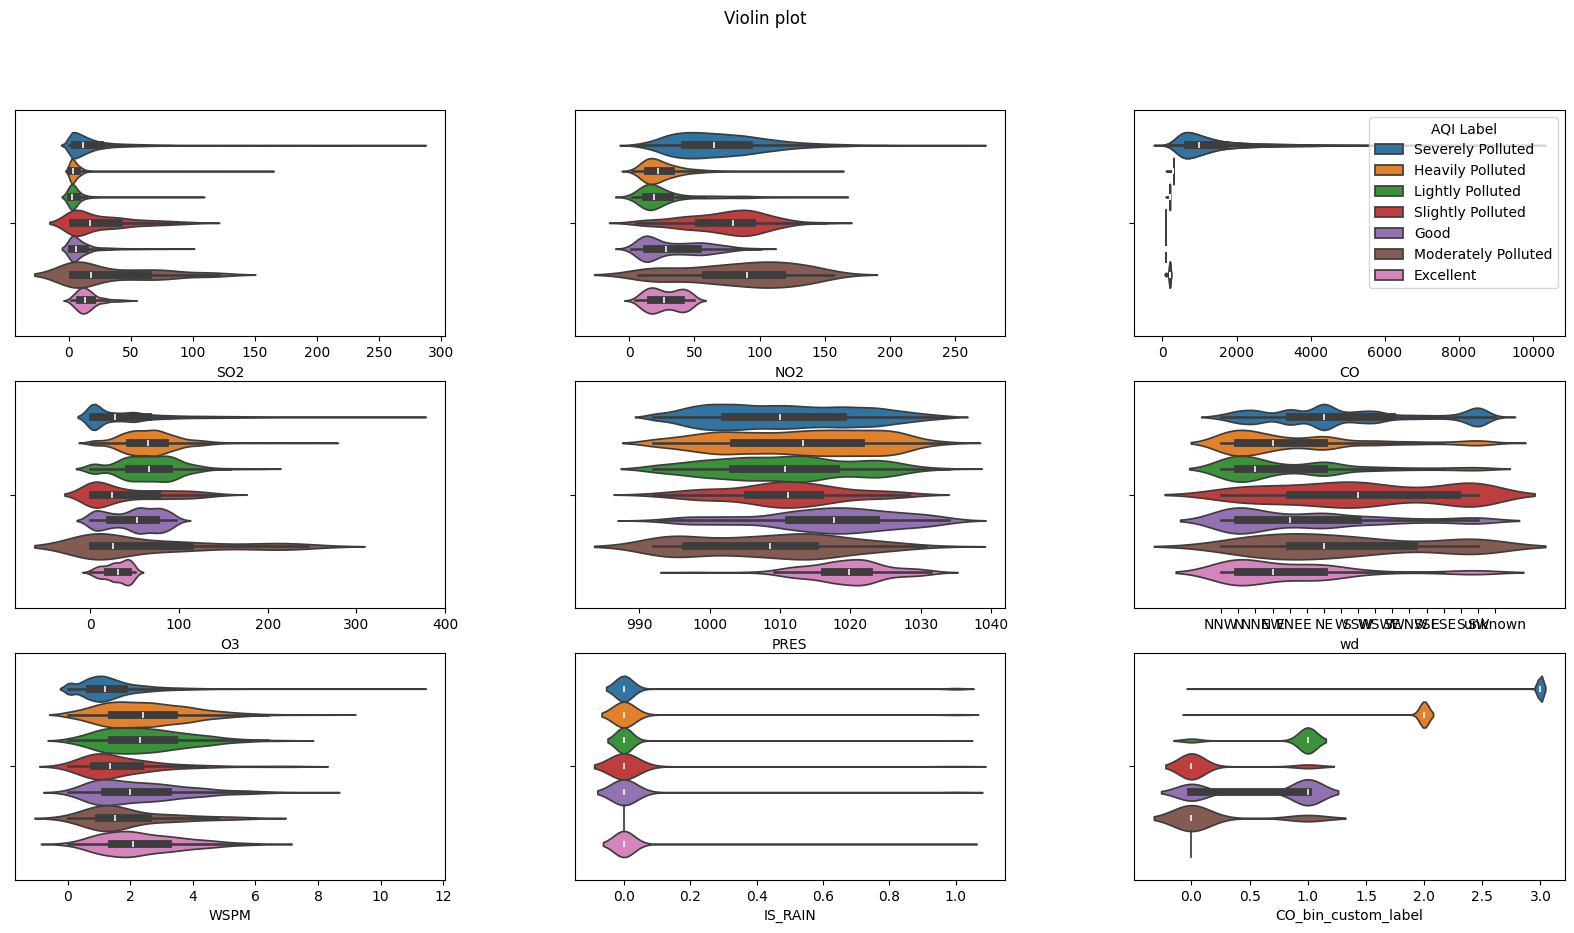

In [99]:
from ast import Name
f = plt.figure(figsize=(20, 10))
for i, name in enumerate(features_name):
  plt.subplot(3, 3, i+1)
  sns.violinplot(data=prsa_data, x=f'{name}', hue="AQI Label", legend=False)
  if i == 2:
    sns.violinplot(data=prsa_data, x=f'{name}', hue="AQI Label")
    continue
f.suptitle('Violin plot')
f.subplots_adjust(wspace=0.3)

####2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [107]:
def clip_data(data, low_per=5, medium_per=50, high_per=95):
  data = data.fillna(data.median())
  arr = np.array(data)
  low_clip = np.percentile(arr, low_per)
  medium_clip = np.percentile(arr, medium_per)
  high_clip = np.percentile(arr, high_per)

  return [low_clip, medium_clip, high_clip]

In [117]:
bin_ranges = clip_data(prsa_data['CO'])
bin_names = [1, 2]

prsa_data['CO_bin_custom_label2'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)

prsa_data['CO_bin_custom_label2'] = prsa_data['CO_bin_custom_label2'].values.add_categories(0)
prsa_data['CO_bin_custom_label2'] = prsa_data['CO_bin_custom_label2'].fillna(0).astype(int)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label,CO_bin_custom_label2
0,1,6,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3,1
1,2,6,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3,1
2,3,18,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3,1
4,5,9,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2,0
5,6,8,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2,0


In [119]:
prsa_data['CO_bin_custom_label2'].describe()

count    34180.000000
mean         1.211118
std          0.752937
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: CO_bin_custom_label2, dtype: float64

####3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

<Axes: >

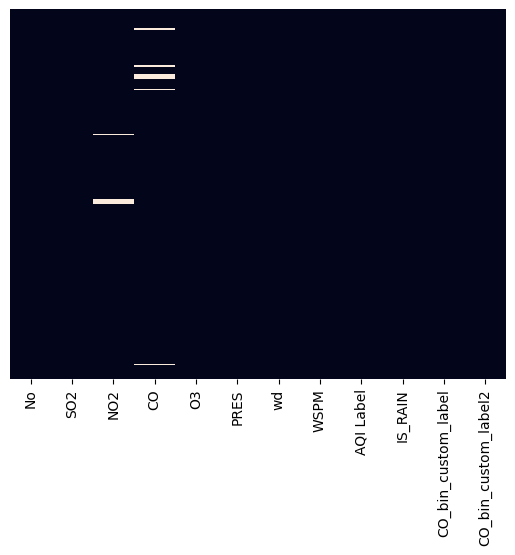

In [120]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [121]:
prsa_data.isnull().sum()

No                         0
SO2                        0
NO2                      702
CO                      1028
O3                         0
PRES                       0
wd                         0
WSPM                       0
AQI Label                  0
IS_RAIN                    0
CO_bin_custom_label        0
CO_bin_custom_label2       0
dtype: int64

In [122]:
prsa_data.NO2 = prsa_data.NO2.fillna(prsa_data.NO2.median())

<Axes: xlabel='NO2', ylabel='Count'>

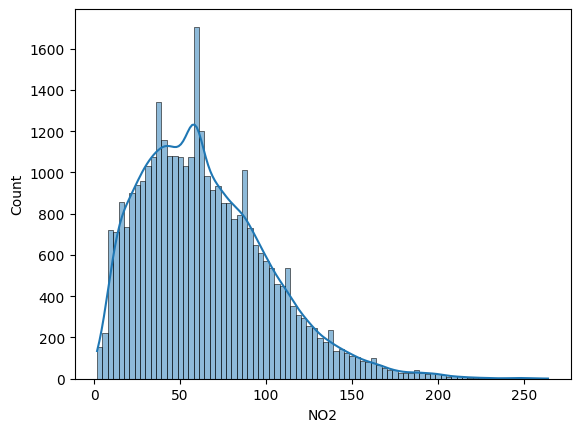

In [125]:
sns.histplot(prsa_data.NO2, kde=True)

<Axes: xlabel='CO', ylabel='Count'>

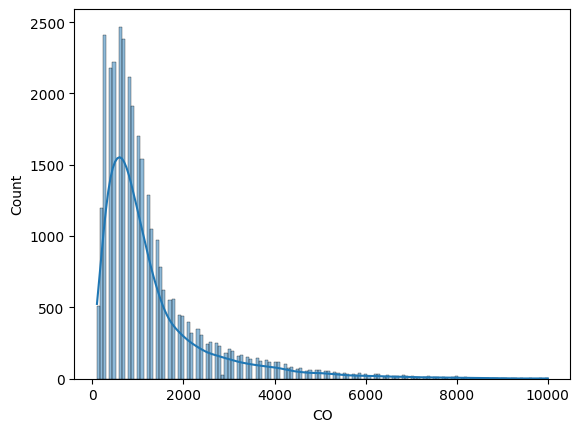

In [126]:
sns.histplot(prsa_data.CO, kde=True)

<Axes: xlabel='CO', ylabel='Count'>

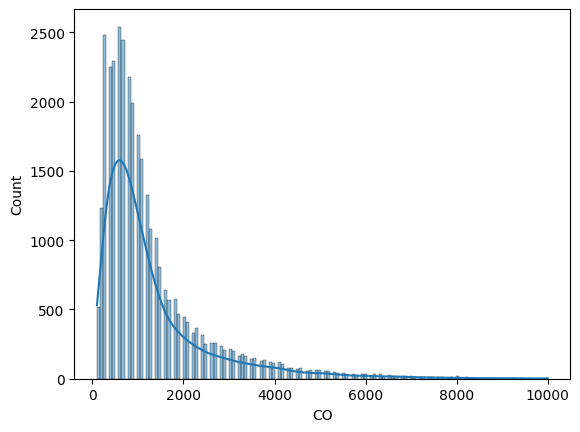

In [127]:
filler = prsa_data.CO[prsa_data.CO.isna()]
filler = prsa_data.CO[~prsa_data.CO.isna()].sample(n=len(filler)).set_axis(filler.index)

prsa_data.CO = prsa_data.CO.fillna(filler)
sns.histplot(prsa_data.CO, kde=True)

<Axes: >

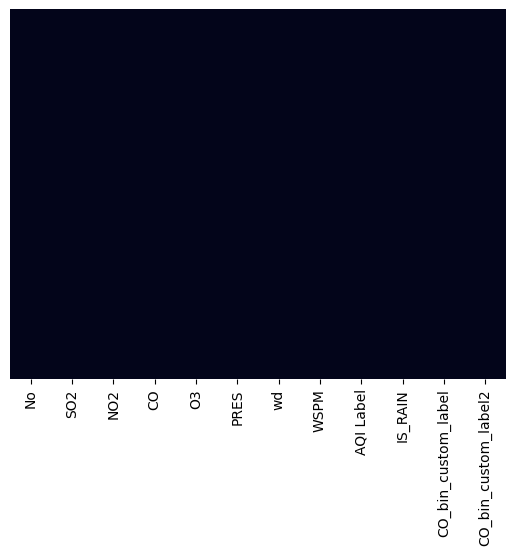

In [128]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

####4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

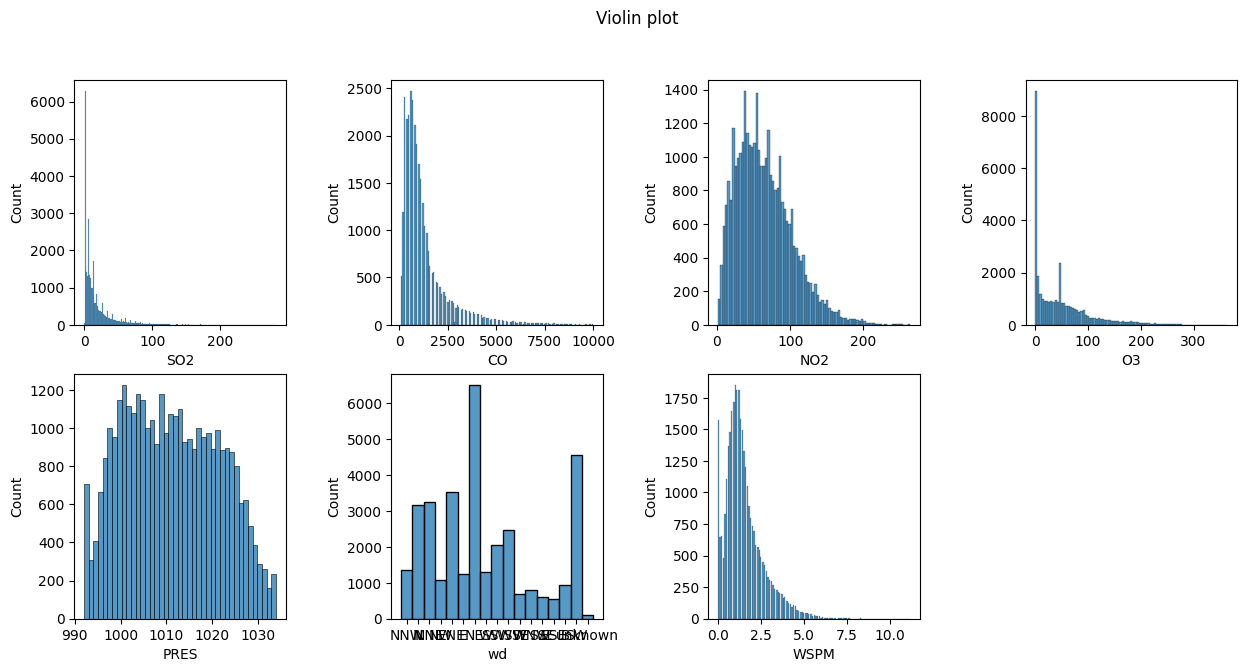

In [129]:
f = plt.figure(figsize=(15, 7))
for i, feature in enumerate(features):
  plt.subplot(2, 4, i+1)
  sns.histplot(data=feature)
f.suptitle('Violin plot')
f.subplots_adjust(wspace=0.5)